In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df_proto_result = pd.read_csv('../result_summary/protonet_cp_result_summary.csv')

#### Does pretraining on random assay works?

In [5]:
### Does pretraining on random assay works?
# Plot shows how many assays improved by pretraining and how many was not
# Degree of improvements

In [6]:
# Inits

before_16 = np.array([float(df_proto_result['16_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_32 = np.array([float(df_proto_result['32_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_64 = np.array([float(df_proto_result['64_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_96 = np.array([float(df_proto_result['96_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])

after_16 = np.array([float(df_proto_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_32 = np.array([float(df_proto_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_64 = np.array([float(df_proto_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_96 = np.array([float(df_proto_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])

diff_16 = after_16 - before_16
diff_32 = after_32 - before_32
diff_64 = after_64 - before_64
diff_96 = after_96 - before_96

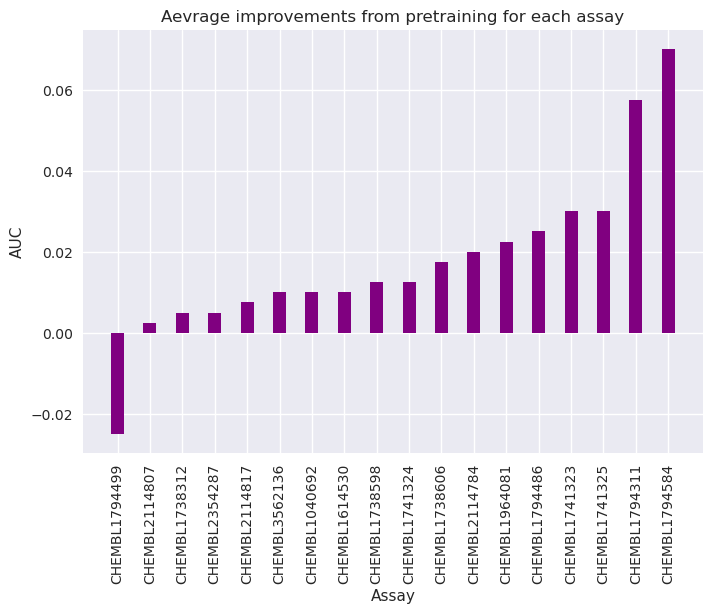

In [7]:
# Improvements for each assay

temp_df = pd.DataFrame({'assay':list(df_proto_result['assay_chembl_id']), 'improvement':list((diff_16 + diff_32 + diff_64 + diff_96)/4)})
temp_df = temp_df.sort_values(by=['improvement'])

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    plt.bar(
            temp_df['assay'], 
            temp_df['improvement'], 
            width=0.4,
            color="purple"
        )
    plt.tick_params(axis='x', labelrotation=90)
    plt.xlabel('Assay')
    plt.ylabel('AUC')
    plt.title('Aevrage improvements from pretraining for each assay')
    plt.show()

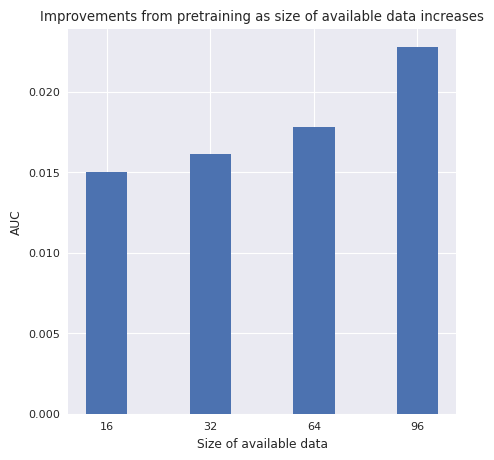

In [8]:
# Improvements from pretraining for various 'size of available data'

with plt.style.context(['seaborn', 'seaborn-paper']):
    plt.figure(figsize=(5, 5))
    plt.bar(
        ['16', '32', '64', '96'], 
        [np.mean(diff_16), np.mean(diff_32), np.mean(diff_64), np.mean(diff_96)], 
        width=0.4,
    )
    plt.xlabel('Size of available data')
    plt.ylabel('AUC')
    plt.title('Improvements from pretraining as size of available data increases')
    plt.show()

In [9]:
# something like https://github.com/microsoft/FS-Mol/blob/main/baselines/plots/all_tasks/1613949.png
# comparing of methods for each task